<a href="https://colab.research.google.com/github/AOseni1/AOseni1/blob/main/TLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id1 = '1_L_QHekyI6SB7KagLBDaBzxu8nCoSZQ8' #<-- You add in here the id from you google drive file, you can find it
file_id2 = '1UMlcxDoz0gb7Oz2DV0wvWR_mvaV1dU4d'

download = drive.CreateFile({'id': file_id1})
download2 = drive.CreateFile({'id': file_id2})

# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")
df.head()

download2.GetContentFile('file2.csv')
df  = pd.read_csv("file2.csv")
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,release_date
0,0,Armin van Buuren,Phone Down,4SfVQLwhg7lKwuEfFwIBAc,62,2019-04-19
1,1,Armin van Buuren,Lifting You Higher (ASOT 900 Anthem) - Blaster...,32iD965RO5haquFAlq5jhz,64,2019-02-22
2,2,Armin van Buuren,Blah Blah Blah,2xkrujtSjZz7EKAYGbIIzH,69,2018-05-18
3,3,Armin van Buuren,Phone Down - Club Mix,1PyBSWc1OxMfH5kdnN0BBm,53,2019-04-26
4,4,Armin van Buuren,Drowning - Avicii Remix,19XDJlw6WxC4XOKC1LGKid,63,2011-03-15


In [64]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from ipywidgets import widgets, interact, Checkbox, Dropdown
import seaborn as sns
sns.set()

trance_tracks = pd.read_csv("file.csv")
trance_track_name_file = pd.read_csv("file2.csv")

tempo = trance_tracks.loc[:,{"tempo", "track_name"}]
track_name = trance_tracks.loc[:,{"track_name", "artist_name"}]


data = pd.merge(tempo,track_name)
data = data.iloc[:1000000,:]
tempo_table = data.pivot_table(index = ["track_name"],columns = ["artist_name"],values = "tempo").fillna(0)
tempo_table.head(10)



artist_name,ALPHA 9,ARTY,Alex M.O.R.P.H.,Alexander Popov,Allen Watts,Aly & Fila,Andrew Bayer,Andrew Bennett,Andrew Rayel,Andy Moor,...,Sophie Sugar,Stoneface & Terminal,Sunny Lax,Super8 & Tab,Tenishia,The Blizzard,The Thrillseekers,Ummet Ozcan,W&W,Will Atkinson
track_name,,,,,,,,,,,,,,,,,,,,,
#ASOT2017 - Mixed by Armin van Buuren,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Acid - Original Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#BOOM - Original Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#BOOM - Radio Edit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Hey - Original Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Slovakboys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Slovakboys - Extended Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#TheValue! - Dub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#TheValue! - Original Mix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


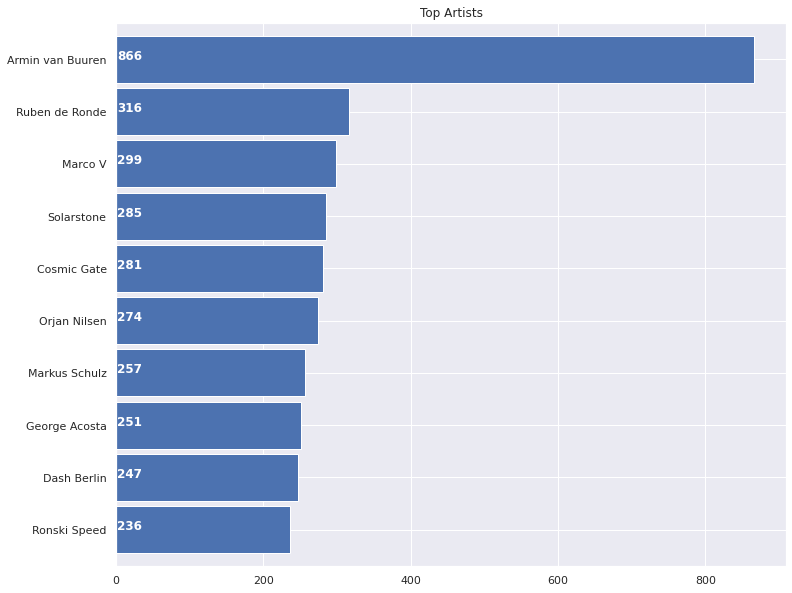

In [5]:
# trance_tracks['artist_name'] = trance_tracks['artist_name'].str.strip('[]').str.replace(' ','').str.replace("'",'')
trance_tracks['artist_name'] = trance_tracks['artist_name'].str.split(',')
plt.subplots(figsize=(12,10))
list1 = []
for i in trance_tracks['artist_name']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Artists')
plt.show()

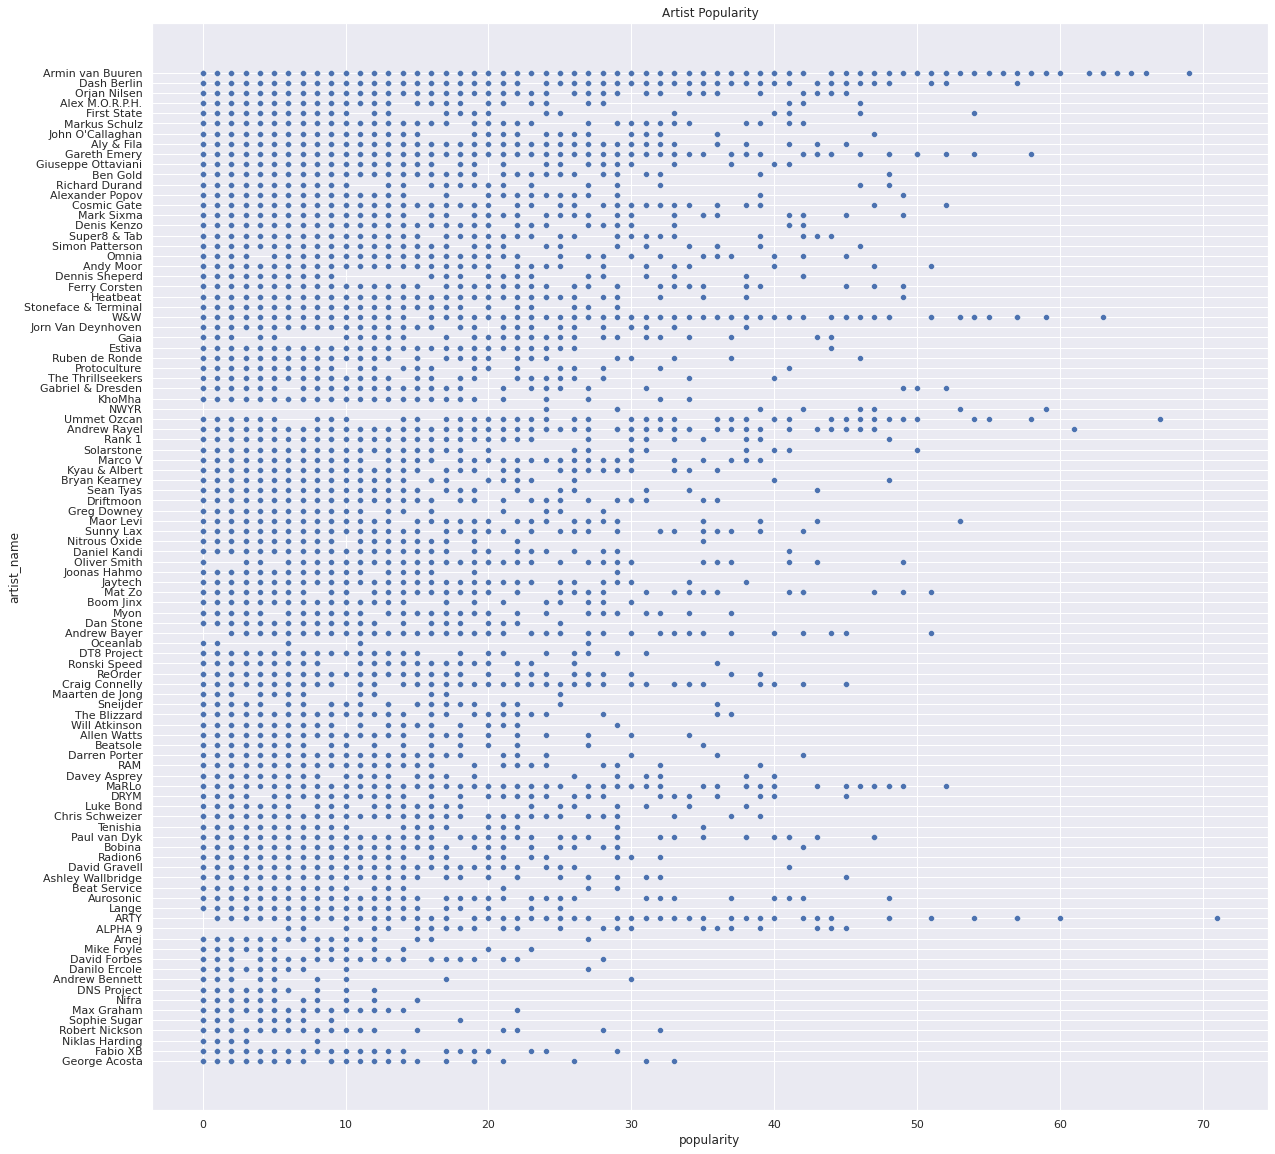

In [4]:
df = pd.read_csv("file.csv", usecols =['artist_name', 'popularity'])
plt.figure(figsize=(20,20))
sns.scatterplot(x=df['popularity'], y=df['artist_name'],
               sizes=(600,600))
title = 'Artist Popularity'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

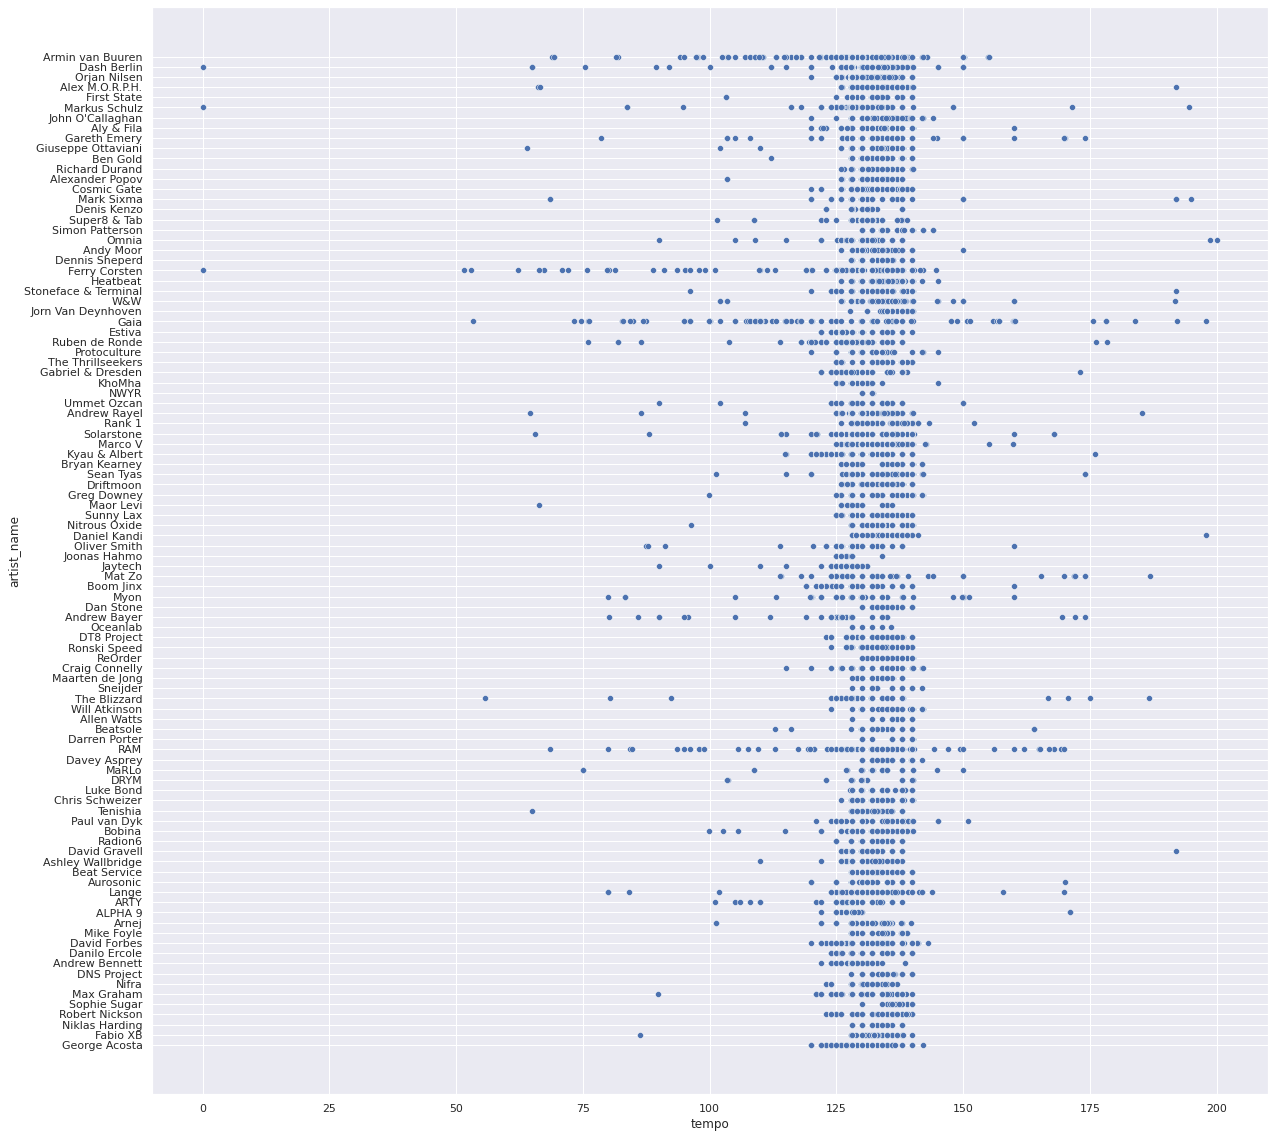

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("file.csv", usecols =['artist_name', 'tempo'])
plt.figure(figsize=(20,20))
sns.scatterplot(x=df['tempo'], y=df['artist_name'],
               sizes=(600,600))

plt.show()

In [76]:
import ipywidgets
from pyparsing import results
# from pyparsing import results
# from pandas.core.ops.array_ops import Any

from functools import partial
from dataclasses import dataclass
from ipywidgets import widgets, interact, Dropdown, Widget
from IPython.display import display, clear_output
from os import system, name 

df = pd.read_csv("file.csv", usecols =['artist_name', 'track_name'])
d = (pd.unique(df['artist_name']))
def on_button_clicked(b):
    clear_output()

button = widgets.Button(description="Reset")
display(button)

button.on_click(on_button_clicked)
d1 = widgets.Dropdown(options = d, description='artists:', value=None)
display(d1)

def on_button_clicked(b):
    clear_output()

button = widgets.Button(description="Reset")


button.on_click(on_button_clicked)

def update_dropdown(change):
    
    result = df.loc[df['artist_name'] == change.new, 'track_name']
    d2 = widgets.Dropdown(options=result, description = 'tracks', value=None)
    
    display(d2)
    
    
    

    def update_dropdown2(change):
      result2 = df.loc[df['track_name'].values == d2.value]

      query_index = np.where(tempo_table.index == d2.value)
     
      needed = tempo_table.index[query_index]
      
      
      tempo_table_matrix = csr_matrix(tempo_table.values)
      model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
      model_knn.fit(tempo_table_matrix)
      distances, indices = model_knn.kneighbors(tempo_table.loc[needed,:].values.reshape(1,-1), n_neighbors = 6)

      
      track = []
      distance = []

      for i in range(0, len(distances.flatten())):
          if i != 0:
              track.append(tempo_table.index[indices.flatten()[i]])
              distance.append(distances.flatten()[i])    

      t=pd.Series(track,name='track')
      d=pd.Series(distance,name='distance')
      recommend = pd.concat([t,d], axis=1)
      recommend = recommend.sort_values('distance',ascending=False)

      print('Recommendations for {0}:\n'.format(needed[0]))
      for i in range(0,recommend.shape[0]):
          print('{1}'.format(i, recommend["track"].iloc[i]))
    new_track = d2.observe(update_dropdown2, names =['value'])
      
new_artist = d1.observe(update_dropdown,names=['value'])










Button(description='Reset', style=ButtonStyle())

Dropdown(description='artists:', options=('Armin van Buuren', 'Dash Berlin', 'Orjan Nilsen', 'Alex M.O.R.P.H.'…

Dropdown(description='tracks', options=('Locked Out Of Heaven', 'Till The Sky Falls Down', 'Gold', "We Don't B…

Recommendations for Till The Sky Falls Down:

Till The Sky Falls Down - Vocal Mix
Waiting - Airplay Mix
Steal You Away - Michael Brun Radio Edit
Underneath The Sky
Waiting - Dash Berlin Miami 2015 Radio Edit
